In [1]:
feature_number = 20
test_size = 0.9
y_feature = 'resale_price'
token = '84e47768480771b0f65f16b3f25447e5ab6b88d174cccb8271d1d0a3e4fdf3ce875e7f9f2612ad64f6f107644f49d8c6d9cd2619469de103753b4ae7556e703a'
backendSever = 'ibm_lagos'

In [2]:
import time
import pandas as pd
import numpy as np
import qiskit
import matplotlib.pyplot as plt
from qiskit_algorithms.optimizers import COBYLA, L_BFGS_B
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN
from qiskit_machine_learning.circuit.library import QNNCircuit
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv(f'../data/flat_data/{feature_number}F/data.csv')
X = data.drop(columns=y_feature)
y = data[y_feature]

In [4]:
train_data, test_data, train_labels , test_labels = train_test_split(X, y, test_size=test_size, random_state=101)

C:\Users\daivesam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


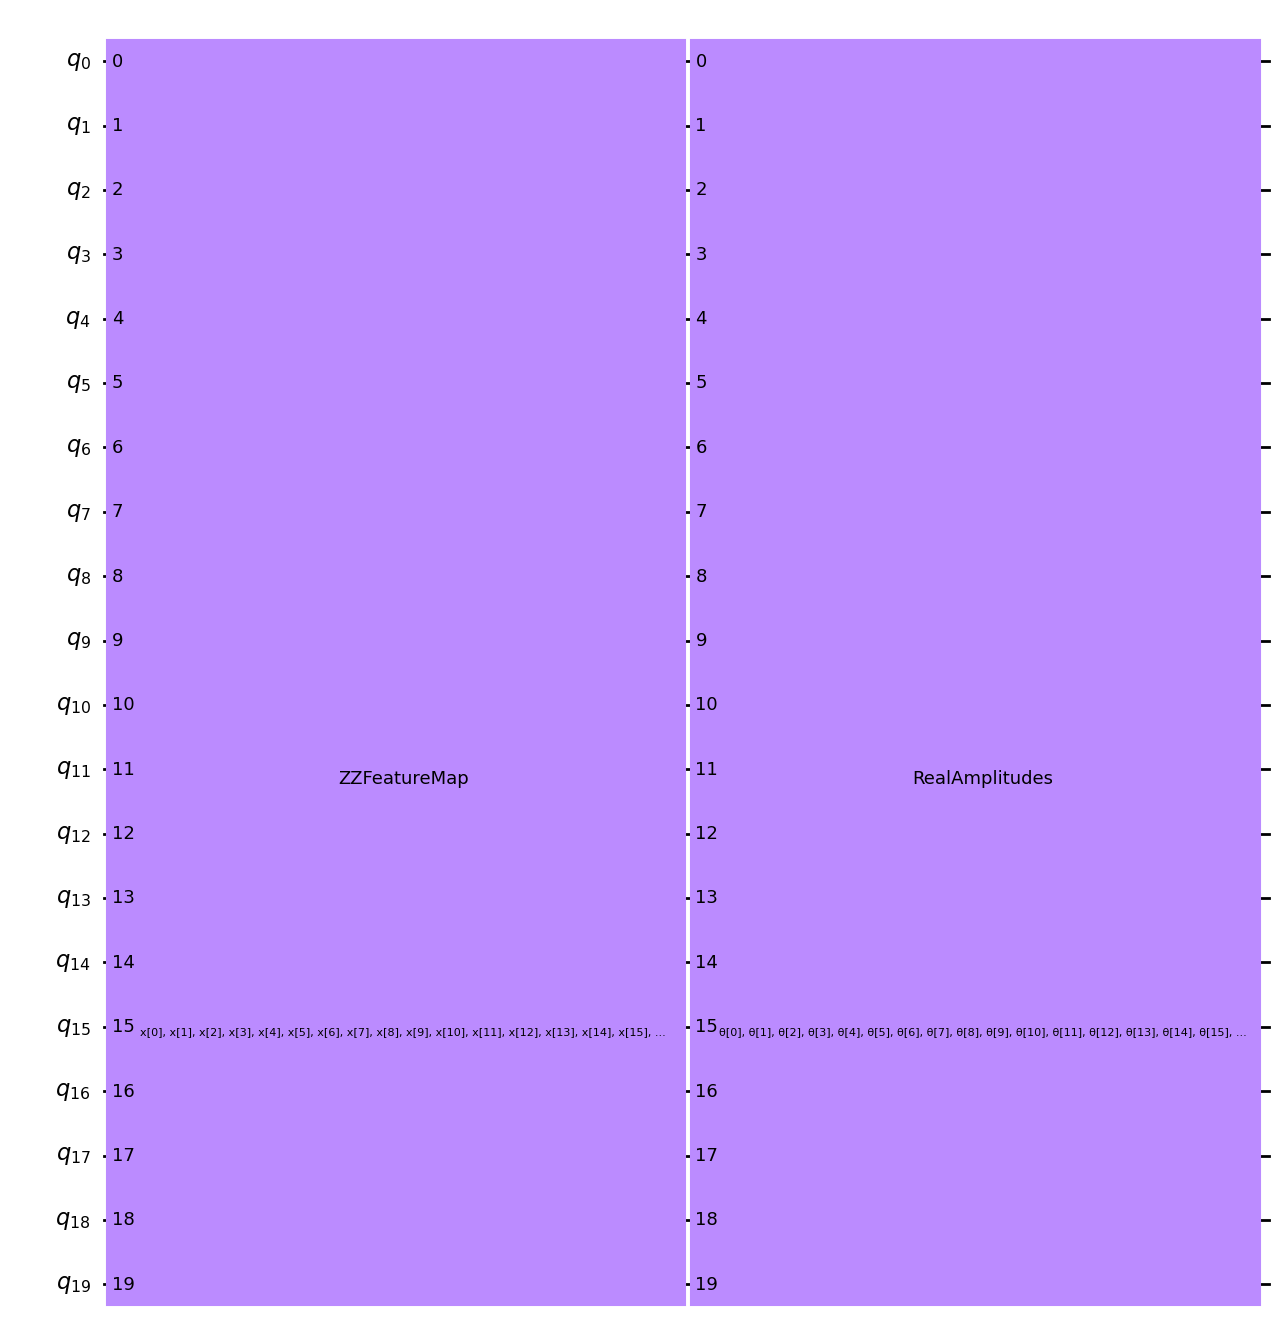

In [5]:
qc = QNNCircuit(num_qubits=feature_number) #number of features
qc.draw('mpl')

In [6]:
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [7]:
from qiskit.primitives import Estimator

In [8]:
from qiskit_ibm_runtime import Estimator, QiskitRuntimeService

service = QiskitRuntimeService(
     channel='ibm_quantum',
    instance='ibm-q/open/main',
    token=token
)
backend = service.backend(backendSever)
estimator = Estimator(backend=backend)

In [9]:
regression_estimator_qnn = EstimatorQNN(circuit=qc,estimator=estimator)
regressor = NeuralNetworkRegressor(neural_network=regression_estimator_qnn,
                                   loss='squared_error',
                                   optimizer=L_BFGS_B(maxiter=1),
                                   callback=callback_graph)

In [10]:
objective_func_vals = []

start_time = time.time()
regressor.fit(train_data,train_labels)
elapsed_time = time.time() - start_time

print(f'Time spent to fit: {elapsed_time}' )

C:\Users\daivesam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\qiskit_ibm_runtime\qiskit_runtime_service.py:1066: UserWarning: The backend ibm_lagos currently has a status of dedicated.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
start_time = time.time()
predicted_test_labels = regressor.predict(test_data)
elapsed_time = time.time() - start_time
print(f'Time spent to predict: {elapsed_time}' )

In [ ]:
start_time = time.time()
score = regressor.score(test_data,test_labels)
elapsed_time = time.time() - start_time
print(f'score : {score} \ntime to score: {elapsed_time}' )

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(test_labels, predicted_test_labels))
print('MSE:', metrics.mean_squared_error(test_labels, predicted_test_labels))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_labels, predicted_test_labels)))